In [173]:
import pandas as pd

## 📥 Step 1: Load the Dataset
We begin by importing the dataset into a pandas DataFrame to explore and clean it.

In [174]:
read=pd.read_csv(r"C:\Users\Administrator\Downloads\housing.csv")

## 🔍 Step 2: Preview the Data
We use `.head()` to view the first few rows and understand the structure of the dataset.

In [175]:
print(read.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


## ❓ Step 3: Identify Missing Values
We check for missing values in each column to determine where cleaning is needed.

In [176]:
null=read.isnull().sum()
print(null)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## 🧹 Step 4: Handle Missing Data

In [177]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
read[['total_bedrooms']] = imputer.fit_transform(read[['total_bedrooms']])
      

## 🔢 Now we verify if the data has been filled

In [178]:
null=read.isnull().sum()
print(null)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## 🧽 Step 5: Remove Duplicate Entries
Duplicate rows may distort the analysis. We check for and remove any duplicate records.

In [179]:
duplicate = read.duplicated().sum()
duplicate

np.int64(0)

## 📊 Detecting and Removing Outliers
Outliers can skew analysis and models. Common techniques for detecting and removing them include:

- **Z-score method**: Identifies how many standard deviations a data point is from the mean.
- **IQR (Interquartile Range) method**: Detects outliers based on the spread of the middle 50% of the data.



In [180]:
from scipy import stats
import numpy as np
columns = ['median_house_value', 'median_income', 'households']
def remove_outliers_iqr(read, columns):
    for col in columns:
        Q1 = read[col].quantile(0.25)
        Q3 = read[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = read[(read[col] >= lower) & (read[col] <= upper)]
    return read

df = remove_outliers_iqr(df, ['median_house_value', 'median_income', 'households'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


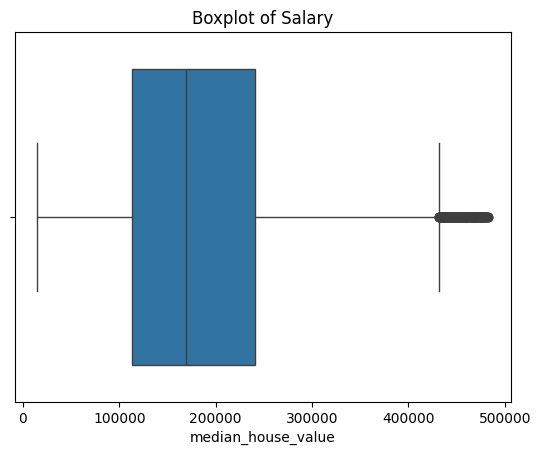

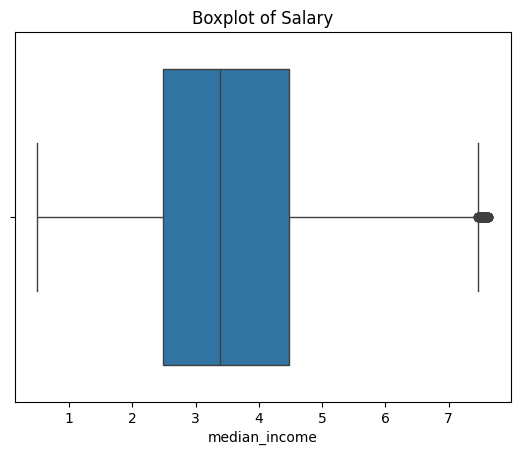

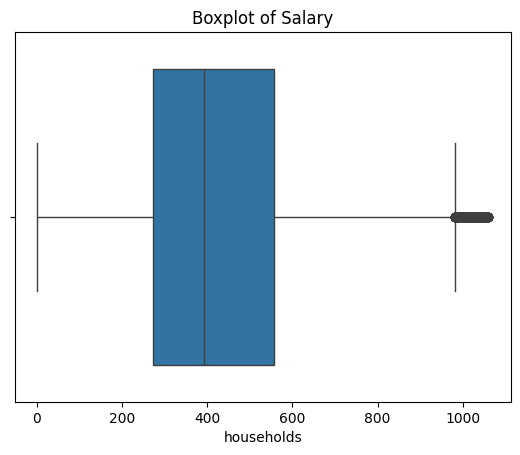

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
col = ['median_house_value', 'median_income', 'households']
for i in col:
    sns.boxplot(x=df[i])
    plt.title("Boxplot of Salary")
    plt.show()


### 📉 Boxplot Review: Outlier Removal Effectiveness

After applying the IQR-based outlier removal method, the updated boxplots indicate that most of the extreme values have been successfully removed. The distributions now appear more compact and less skewed, suggesting the dataset is cleaner and more suitable for analysis.

In [182]:
print(read.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
